In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('VIVO_CHURN.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
# Encode other variables
df.drop(['customerID'], axis=1, inplace=True)
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df.isna().sum()
df.dropna(inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Convert labels from Yes/No to 1/0 for Churn
df['Churn'].replace('Yes', 1, inplace=True)
df['Churn'].replace('No', 0, inplace=True)

# Convert labels from 1/0 to Yes/No for SeniorCitizen
df['SeniorCitizen'].replace(1, 'Yes', inplace=True)
df['SeniorCitizen'].replace(0, 'No', inplace=True)


df_onehot = pd.get_dummies(df)
df_onehot.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [9]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   uint8  
 5   gender_Male                              7032 non-null   uint8  
 6   SeniorCitizen_No                         7032 non-null   uint8  
 7   SeniorCitizen_Yes                        7032 non-null   uint8  
 8   Partner_No                               7032 non-null   uint8  
 9   Partner_Yes                              7032 non-null   uint8  
 10  Dependents_No                            7032 no

In [10]:
from autoML import AutoML
automl = AutoML(df_onehot, 'Churn')
automl.getResults()

,algorithm,features,n_features,train_time,mem_max,f1,accuracy,roc_auc,confusion_matrix
0,SVC,"(tenure, OnlineSecurity_No, TechSupport_No, Co...",6,3.085355,375.414062,0.574212,0.783915,0.756487,"[[955, 76], [241, 135]]"
1,LogisticRegression,"(InternetService_Fiber optic, OnlineSecurity_N...",6,2.168433,308.589844,0.574078,0.783236,0.815689,"[[911, 120], [177, 199]]"
2,LogisticRegression,"(tenure, InternetService_Fiber optic, OnlineSe...",6,2.559586,308.246094,0.570872,0.797441,0.830813,"[[943, 88], [189, 187]]"
3,SVC,"(InternetService_Fiber optic, OnlineSecurity_N...",6,2.603267,364.347656,0.560193,0.791040,0.741526,"[[970, 61], [255, 121]]"
4,LogisticRegression,"(tenure, InternetService_Fiber optic, OnlineSe...",6,2.547215,308.097656,0.559682,0.791045,0.834772,"[[935, 96], [183, 193]]"
5,DecisionTreeClassifier,"(InternetService_Fiber optic, OnlineSecurity_N...",6,2.347394,311.289062,0.556218,0.783239,0.806769,"[[970, 61], [255, 121]]"
6,LogisticRegression,"(tenure, InternetService_Fiber optic, TechSupp...",6,2.663510,308.558594,0.555337,0.793170,0.834158,"[[948, 83], [204, 172]]"
7,LogisticRegression,"(tenure, OnlineSecurity_No, TechSupport_No, Co...",6,2.942834,308.585938,0.552367,0.783928,0.819202,"[[928, 103], [199, 177]]"
8,LogisticRegression,"(tenure, InternetService_Fiber optic, OnlineSe...",6,2.603230,307.828125,0.551834,0.791754,0.832437,"[[945, 86], [202, 174]]"
9,LogisticRegression,"(tenure, InternetService_Fiber optic, OnlineSe...",7,3.116714,308.191406,0.551552,0.788198,0.834482,"[[934, 97], [185, 191]]"


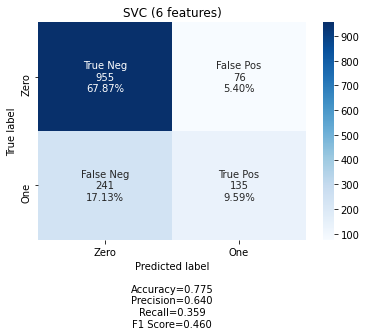

In [11]:
automl.getBestConfusionMatrix()

In [13]:
automl.getBestResult().features

('tenure',
 'OnlineSecurity_No',
 'TechSupport_No',
 'Contract_Month-to-month',
 'Contract_Two year',
 'PaymentMethod_Electronic check')